In [1]:
import os
import h5py
import nrrd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
seg_file = "/Volumes/LaCie/scratch/160_10-layer/labels/00/160_10-layer_0460-0690_0690-0920/160_10-layer_00_predictions_0460-0690_0690-0920.pred24_02_12.seg.nrrd"
vol_file = "/Volumes/LaCie/scratch/160_10-layer/volumes/00/160_10-layer_00_0460-0690_0690-0920.h5"
assert os.path.exists(vol_file)

In [4]:
def readH5(file_path,**kwargs):
    """
    generic function to read a h5 file with one 
    subgroup elements by given filepath in a Dictonary 
    """

    import h5py as h5
    
    out = {}

    with h5.File(file_path, 'r') as f:

        for key in f.keys():

            if isinstance(f[key],h5.Group):
                out[key] = {}
                for sub_key in f[key]:
                    out[key][sub_key] = f[key][sub_key][...]
            else:
                out[key] = f[key][:]
        f.close()
    return out

In [5]:
vol = readH5(vol_file)

In [6]:
seg , header_seg = nrrd.read(seg_file)

In [7]:
obj_ids = np.unique(seg)
obj_ids = obj_ids[0:]
masks = seg == obj_ids[:, None, None, None]

<bound method Figure.tight_layout of <Figure size 1800x480 with 5 Axes>>

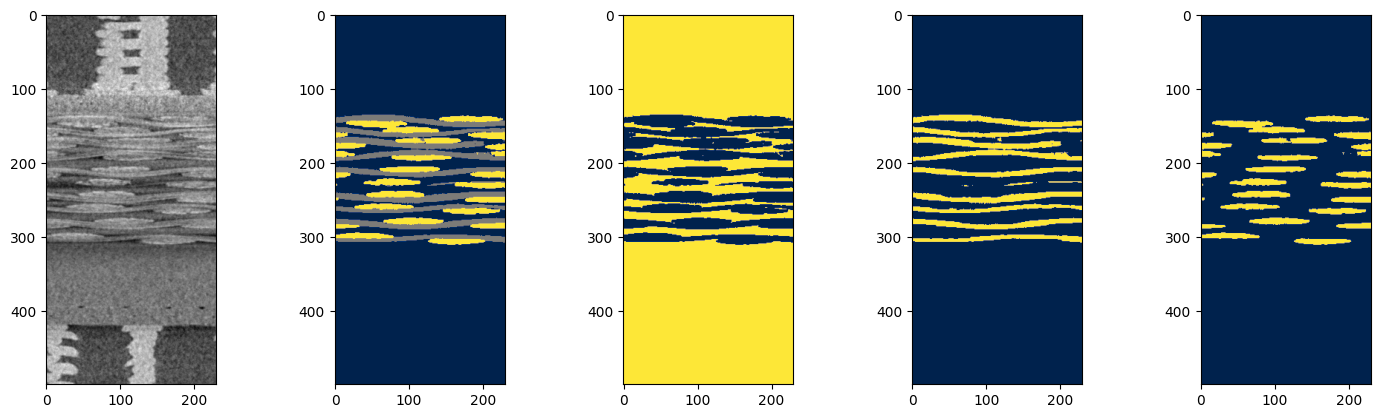

In [8]:
fig, axs = plt.subplots(1,5,figsize=(3.6*5,4.8))

axs = axs.flatten()

slice = 120

axs[0].imshow(vol["raw"][:,slice,:],cmap="grey")
axs[1].imshow(seg[:,slice,:],cmap="cividis")


axs[2].imshow(masks[0,:,slice,:],cmap="cividis")
axs[3].imshow(masks[1,:,slice,:],cmap="cividis")
axs[4].imshow(masks[2,:,slice,:],cmap="cividis")

fig.tight_layout

In [9]:
out = vol

out["labels"] = seg
out["masks"] = masks

In [10]:
path_out = "/Volumes/LaCie/scratch/160_10-layer/labels/00/160_10-layer_0460-0690_0690-0920_val.seg.h5"

In [11]:
with h5py.File(path_out, 'w',) as fout:
    for key in out.keys():
        if key == "volume_data":
            volume_group = fout.create_group('volume_data')
            for key, value in out['volume_data'].items():
                volume_group.create_dataset(key, data=value)
        else:
            fout.create_dataset(key, data = out[key],compression="gzip")